lot를 모델에 워드 임베딩으로 넣어줌

임베딩을 추가했을때는 표준화모델이 더 나은것으로 보임



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [ ]:
!pwd

/content


In [ ]:
!unzip '/content/drive/MyDrive/dataset/전해탈지.zip' -d ./

Archive:  /content/drive/MyDrive/dataset/전해탈지.zip
  inflating: ./data/Error Lot list.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.06.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.07.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.08.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.09.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.10.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.13.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.14.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.15.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.16.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.17.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.23.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.24.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.27.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.28.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.29.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.30.csv  
  inflating: ./data/kemp-abh-sensor-2021.10.01.csv  
  

data파일 안에 날짜별 csv가 한번에 들어있는 형태

Error Lot list를 타겟 파일로 해석


In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.read_csv('/content/data/kemp-abh-sensor-2021.09.06.csv')

In [ ]:
df_1

Index  Lot          Time     pH   Temp  Current
0         1    1  오후 4:29:15.0  10.37  42.87     7.34
1         2    1  오후 4:29:20.0  10.90  42.70     8.26
2         3    1  오후 4:29:25.0   9.61  42.37     8.46
3         4    1  오후 4:29:30.0  10.32  45.85     8.04
4         5    1  오후 4:29:35.0  10.36  44.18     7.23
...     ...  ...           ...    ...    ...      ...
1513   1514   22  오후 6:43:02.1  10.00  45.46     7.78
1514   1515   22  오후 6:43:07.1  10.55  44.47     7.65
1515   1516   22  오후 6:43:12.1   9.80  45.34     7.08
1516   1517   22  오후 6:43:17.1   9.76  43.09     7.84
1517   1518   22  오후 6:43:22.1   9.84  44.27     7.18

[1518 rows x 6 columns]

## error파일

In [ ]:
df_err = pd.read_csv('/content/data/Error Lot list.csv')
df_err.head()

Index        Date   LoT  LoT2
0      1  2021-09-06   NaN   NaN
1      2  2021-09-07  13.0   NaN
2      3  2021-09-08   1.0  22.0
3      4  2021-09-09   NaN   NaN
4      5  2021-09-10   NaN   NaN

In [ ]:
df_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   33 non-null     int64  
 1   Date    33 non-null     object 
 2   LoT     13 non-null     float64
 3   LoT2    2 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df_err = df_err.fillna(0)

In [ ]:
df_err['LoT'] = df_err['LoT'].astype('int')
df_err['LoT2'] = df_err['LoT2'].astype('int')

In [ ]:
df_err.info

<bound method DataFrame.info of     Index        Date  LoT  LoT2
0       1  2021-09-06    0     0
1       2  2021-09-07   13     0
2       3  2021-09-08    1    22
3       4  2021-09-09    0     0
4       5  2021-09-10    0     0
5       6  2021-09-13    0     0
6       7  2021-09-14    5     0
7       8  2021-09-15    5     0
8       9  2021-09-16    0     0
9      10  2021-09-17    0     0
10     11  2021-09-23   13     0
11     12  2021-09-24    0     0
12     13  2021-09-27    0     0
13     14  2021-09-28    0     0
14     15  2021-09-29    9     0
15     16  2021-09-30    0     0
16     17  2021-10-01    8     0
17     18  2021-10-05   17     0
18     19  2021-10-06   19     0
19     20  2021-10-07    0     0
20     21  2021-10-08   14     0
21     22  2021-10-12    0     0
22     23  2021-10-13    0     0
23     24  2021-10-14    0     0
24     25  2021-10-15    0     0
25     26  2021-10-18    5    22
26     27  2021-10-19    0     0
27     28  2021-10-20    0     0
28     29  

### column 추가 예시

In [ ]:
df_1['date'] = '2021.09.06'

In [ ]:
df_1

Index  Lot          Time     pH   Temp  Current        date
0         1    1  오후 4:29:15.0  10.37  42.87     7.34  2021.09.06
1         2    1  오후 4:29:20.0  10.90  42.70     8.26  2021.09.06
2         3    1  오후 4:29:25.0   9.61  42.37     8.46  2021.09.06
3         4    1  오후 4:29:30.0  10.32  45.85     8.04  2021.09.06
4         5    1  오후 4:29:35.0  10.36  44.18     7.23  2021.09.06
...     ...  ...           ...    ...    ...      ...         ...
1513   1514   22  오후 6:43:02.1  10.00  45.46     7.78  2021.09.06
1514   1515   22  오후 6:43:07.1  10.55  44.47     7.65  2021.09.06
1515   1516   22  오후 6:43:12.1   9.80  45.34     7.08  2021.09.06
1516   1517   22  오후 6:43:17.1   9.76  43.09     7.84  2021.09.06
1517   1518   22  오후 6:43:22.1   9.84  44.27     7.18  2021.09.06

[1518 rows x 7 columns]

# 데이터 합치기

### os.listdir
'data' 파일 안에 있는 모든 파일이름 리스트로 생성

In [ ]:
import os

In [ ]:
oslist = os.listdir('data')
oslist.sort()
oslist.pop(0)
oslist

['kemp-abh-sensor-2021.09.06.csv',
 'kemp-abh-sensor-2021.09.07.csv',
 'kemp-abh-sensor-2021.09.08.csv',
 'kemp-abh-sensor-2021.09.09.csv',
 'kemp-abh-sensor-2021.09.10.csv',
 'kemp-abh-sensor-2021.09.13.csv',
 'kemp-abh-sensor-2021.09.14.csv',
 'kemp-abh-sensor-2021.09.15.csv',
 'kemp-abh-sensor-2021.09.16.csv',
 'kemp-abh-sensor-2021.09.17.csv',
 'kemp-abh-sensor-2021.09.23.csv',
 'kemp-abh-sensor-2021.09.24.csv',
 'kemp-abh-sensor-2021.09.27.csv',
 'kemp-abh-sensor-2021.09.28.csv',
 'kemp-abh-sensor-2021.09.29.csv',
 'kemp-abh-sensor-2021.09.30.csv',
 'kemp-abh-sensor-2021.10.01.csv',
 'kemp-abh-sensor-2021.10.05.csv',
 'kemp-abh-sensor-2021.10.06.csv',
 'kemp-abh-sensor-2021.10.07.csv',
 'kemp-abh-sensor-2021.10.08.csv',
 'kemp-abh-sensor-2021.10.12.csv',
 'kemp-abh-sensor-2021.10.13.csv',
 'kemp-abh-sensor-2021.10.14.csv',
 'kemp-abh-sensor-2021.10.15.csv',
 'kemp-abh-sensor-2021.10.18.csv',
 'kemp-abh-sensor-2021.10.19.csv',
 'kemp-abh-sensor-2021.10.20.csv',
 'kemp-abh-sensor-20

In [ ]:
len(oslist)

33

In [ ]:
oslist[0][16:26]

'2021.09.06'

In [ ]:
oslists = []

for i in range(len(oslist)):
  if len(oslist[i]) > 26:
    oslists.append(oslist[i][16:26])

In [ ]:
oslists.sort()

In [ ]:
oslists

['2021.09.06',
 '2021.09.07',
 '2021.09.08',
 '2021.09.09',
 '2021.09.10',
 '2021.09.13',
 '2021.09.14',
 '2021.09.15',
 '2021.09.16',
 '2021.09.17',
 '2021.09.23',
 '2021.09.24',
 '2021.09.27',
 '2021.09.28',
 '2021.09.29',
 '2021.09.30',
 '2021.10.01',
 '2021.10.05',
 '2021.10.06',
 '2021.10.07',
 '2021.10.08',
 '2021.10.12',
 '2021.10.13',
 '2021.10.14',
 '2021.10.15',
 '2021.10.18',
 '2021.10.19',
 '2021.10.20',
 '2021.10.21',
 '2021.10.22',
 '2021.10.25',
 '2021.10.26',
 '2021.10.27']

In [ ]:
for i in range(len(oslists)):
  oslists[i] = oslists[i].replace('.','-')

In [ ]:
oslists

['2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-23',
 '2021-09-24',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-10-01',
 '2021-10-05',
 '2021-10-06',
 '2021-10-07',
 '2021-10-08',
 '2021-10-12',
 '2021-10-13',
 '2021-10-14',
 '2021-10-15',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-25',
 '2021-10-26',
 '2021-10-27']

In [ ]:
import glob as gl

In [ ]:
Path = gl.glob('/content/data/kemp-abh-sensor-*.csv')
Path.sort()
Path

['/content/data/kemp-abh-sensor-2021.09.06.csv',
 '/content/data/kemp-abh-sensor-2021.09.07.csv',
 '/content/data/kemp-abh-sensor-2021.09.08.csv',
 '/content/data/kemp-abh-sensor-2021.09.09.csv',
 '/content/data/kemp-abh-sensor-2021.09.10.csv',
 '/content/data/kemp-abh-sensor-2021.09.13.csv',
 '/content/data/kemp-abh-sensor-2021.09.14.csv',
 '/content/data/kemp-abh-sensor-2021.09.15.csv',
 '/content/data/kemp-abh-sensor-2021.09.16.csv',
 '/content/data/kemp-abh-sensor-2021.09.17.csv',
 '/content/data/kemp-abh-sensor-2021.09.23.csv',
 '/content/data/kemp-abh-sensor-2021.09.24.csv',
 '/content/data/kemp-abh-sensor-2021.09.27.csv',
 '/content/data/kemp-abh-sensor-2021.09.28.csv',
 '/content/data/kemp-abh-sensor-2021.09.29.csv',
 '/content/data/kemp-abh-sensor-2021.09.30.csv',
 '/content/data/kemp-abh-sensor-2021.10.01.csv',
 '/content/data/kemp-abh-sensor-2021.10.05.csv',
 '/content/data/kemp-abh-sensor-2021.10.06.csv',
 '/content/data/kemp-abh-sensor-2021.10.07.csv',
 '/content/data/kemp

## train / test 나누기
- train 0.8
- test 0.2

In [ ]:
len(Path)

33

In [ ]:
len(Path[:26])
Path_train = Path[:26]
# Path_train

In [ ]:
# len(Path[19:26])
# Path_val = Path[19:26]
# Path_val

In [ ]:
len(Path[26:])
Path_test = Path[26:]
# Path_test

## 새로운 columns 추가 & 데이터 병합

- date 날짜
- err 에러 발생여부

In [ ]:
df_err.loc[df_err['Index']==1, 'Date']

0    2021-09-06
Name: Date, dtype: object

In [ ]:
df_err['Date'][0]

'2021-09-06'

## 전체 데이터

In [ ]:
df = pd.read_csv('%s' % Path[0])
df['date'] = oslists[0]
df['err'] = 0

for i in range(1, len(Path)):
  df_a = pd.read_csv('%s' % Path[i])
  df_a['date'] = oslists[i]
  # df_a['date'] = df_a['date'].apply(lambda x: x.replace('.','-'))
  df_a['err'] = 0
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  df = pd.concat([df, df_a])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  int64  
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 3.4+ MB


In [ ]:
df

Index  Lot          Time     pH   Temp  Current        date  err
0         1    1  오후 4:29:15.0  10.37  42.87     7.34  2021-09-06    0
1         2    1  오후 4:29:20.0  10.90  42.70     8.26  2021-09-06    0
2         3    1  오후 4:29:25.0   9.61  42.37     8.46  2021-09-06    0
3         4    1  오후 4:29:30.0  10.32  45.85     8.04  2021-09-06    0
4         5    1  오후 4:29:35.0  10.36  44.18     7.23  2021-09-06    0
...     ...  ...           ...    ...    ...      ...         ...  ...
1513   1514   22  오후 6:39:05.9   9.79  43.52     8.55  2021-10-27    0
1514   1515   22  오후 6:39:10.9   9.53  44.44     7.36  2021-10-27    0
1515   1516   22  오후 6:39:15.9   9.86  46.54     8.15  2021-10-27    0
1516   1517   22  오후 6:39:20.9  10.52  47.88     7.97  2021-10-27    0
1517   1518   22  오후 6:39:25.9  10.97  43.02     8.98  2021-10-27    0

[50094 rows x 8 columns]

In [ ]:
df.Lot = df.Lot.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  object 
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ MB


## 데이터 나누기

In [ ]:
train = pd.read_csv('%s' % Path_train[0])
train['date'] = oslists[0]
train['err'] = 0

for i in range(1, 26):
  train_a = pd.read_csv('%s' % Path[i])
  train_a['date'] = oslists[i]
  # train_a['date'] = train_a['date'].apply(lambda x: x.replace('.','-'))
  train_a['err'] = 0
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  train = pd.concat([train, train_a])

In [ ]:
train.loc[train['err'] == 1, 'Lot'].unique()

array([13,  1, 22,  5,  9,  8, 17, 19, 14])

In [ ]:
train

Index  Lot          Time     pH   Temp  Current        date  err
0         1    1  오후 4:29:15.0  10.37  42.87     7.34  2021-09-06    0
1         2    1  오후 4:29:20.0  10.90  42.70     8.26  2021-09-06    0
2         3    1  오후 4:29:25.0   9.61  42.37     8.46  2021-09-06    0
3         4    1  오후 4:29:30.0  10.32  45.85     8.04  2021-09-06    0
4         5    1  오후 4:29:35.0  10.36  44.18     7.23  2021-09-06    0
...     ...  ...           ...    ...    ...      ...         ...  ...
1513   1514   22  오후 6:33:52.1  10.34  46.59     7.75  2021-10-18    1
1514   1515   22  오후 6:33:57.1  10.74  46.58     8.87  2021-10-18    1
1515   1516   22  오후 6:34:02.1  10.92  42.91     7.48  2021-10-18    1
1516   1517   22  오후 6:34:07.1   9.97  47.78     7.80  2021-10-18    1
1517   1518   22  오후 6:34:12.1  10.33  43.03     8.68  2021-10-18    1

[39468 rows x 8 columns]

In [ ]:
# train.Lot = train.Lot.astype(str)
# train.info()

In [ ]:
# val = pd.read_csv('%s' % Path_val[0])
# val['date'] = oslists[19]
# val['err'] = 0

# for i in range(19, 26):
#   val_a = pd.read_csv('%s' % Path[i])
#   val_a['date'] = oslists[i]
#   # val_a['date'] = val_a['date'].apply(lambda x: x.replace('.','-'))
#   val_a['err'] = 0
#   val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
#   val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
#   val = pd.concat([val, val_a])

In [ ]:
# val.loc[val['err'] == 1, 'Lot'].unique()

In [ ]:
# val

In [ ]:
# val.Lot = val.Lot.astype(str)
# val.info()

In [ ]:
test = pd.read_csv('%s' % Path_test[0])
test['date'] = oslists[26]
test['err'] = 0

for i in range(26, 33):
  test_a = pd.read_csv('%s' % Path[i])
  test_a['date'] = oslists[i]
  # test_a['date'] = test_a['date'].apply(lambda x: x.replace('.','-'))
  test_a['err'] = 0
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  test = pd.concat([test, test_a])

In [ ]:
test.loc[test['err'] == 1, 'Lot'].unique()

array([19, 15])

In [ ]:
test

Index  Lot          Time     pH   Temp  Current        date  err
0         1    1  오후 4:22:37.0  10.93  43.86     7.44  2021-10-19    0
1         2    1  오후 4:22:42.0  10.59  43.39     8.58  2021-10-19    0
2         3    1  오후 4:22:47.0   9.78  45.50     8.59  2021-10-19    0
3         4    1  오후 4:22:52.0  10.53  45.31     8.23  2021-10-19    0
4         5    1  오후 4:22:57.0  10.24  46.65     8.96  2021-10-19    0
...     ...  ...           ...    ...    ...      ...         ...  ...
1513   1514   22  오후 6:39:05.9   9.79  43.52     8.55  2021-10-27    0
1514   1515   22  오후 6:39:10.9   9.53  44.44     7.36  2021-10-27    0
1515   1516   22  오후 6:39:15.9   9.86  46.54     8.15  2021-10-27    0
1516   1517   22  오후 6:39:20.9  10.52  47.88     7.97  2021-10-27    0
1517   1518   22  오후 6:39:25.9  10.97  43.02     8.98  2021-10-27    0

[12144 rows x 8 columns]

In [ ]:
# test.Lot = test.Lot.astype(str)
# test.info()

# 데이터 정규화
- sigmoid 네트워크 뉴런의 일반적인 활성화함수는 [-1,1], [0,1] 간격

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# mmscaler = MinMaxScaler()

# df_copy = df.copy()
# train_copy = train.copy()
# val_copy = val.copy()
# test_copy = test.copy()

# def normalize(dataframe):
#   dataframe['pH'] = mmscaler.fit_transform(dataframe.pH.values.reshape(-1,1))
#   dataframe['Temp'] = mmscaler.fit_transform(dataframe.Temp.values.reshape(-1,1))
#   dataframe['Current'] = mmscaler.fit_transform(dataframe.Current.values.reshape(-1,1))
#   return dataframe

# train_sc = normalize(train_copy)
# val_sc = normalize(val_copy)
# test_sc = normalize(test_copy)
# df_sc = normalize(df_copy)

In [ ]:
# train_sc

### x, y 데이터 나누기
- x : 'Lot', 'pH', 'Temp', 'Current'
- y : 'err'

In [ ]:
df.columns

Index(['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date', 'err'], dtype='object')

In [ ]:
df_x = df.drop(columns = ['Index', 'Time', 'date', 'err'])
train_x = train.drop(columns = ['Index', 'Time', 'date', 'err'])
# val_x = val.drop(columns = ['Index', 'Time', 'date', 'err'])
test_x = test.drop(columns = ['Index', 'Time', 'date', 'err'])

In [ ]:
df_y = df.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
train_y = train.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
# val_y = val.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
test_y = test.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])

# plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df.loc[df['Lot']==str(22)])/69

33.0

## 전체데이터 Lot별 plot

In [ ]:
df_eplot = df.loc[df['Lot']==str(1)]
len(df_eplot)

2277

In [ ]:
df_eplot['Index']

0      1
1      2
2      3
3      4
4      5
      ..
64    65
65    66
66    67
67    68
68    69
Name: Index, Length: 2277, dtype: int64

In [ ]:
import numpy as np

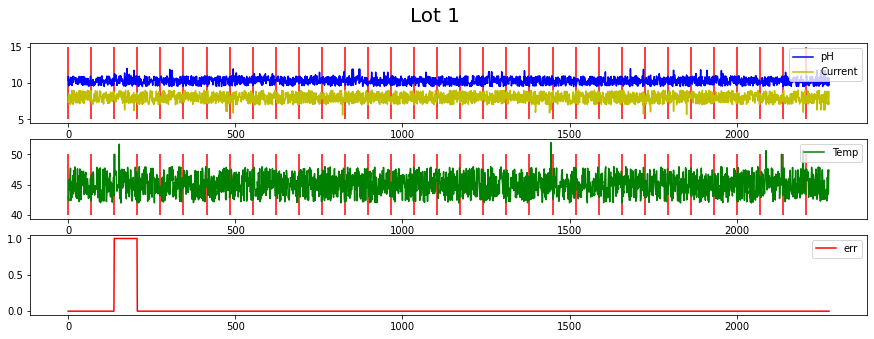

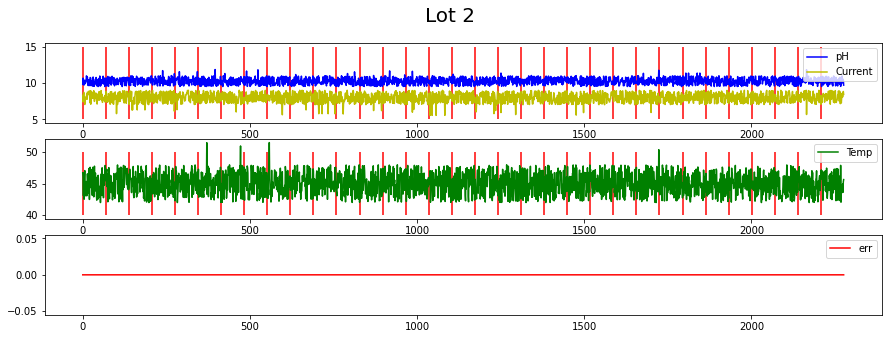

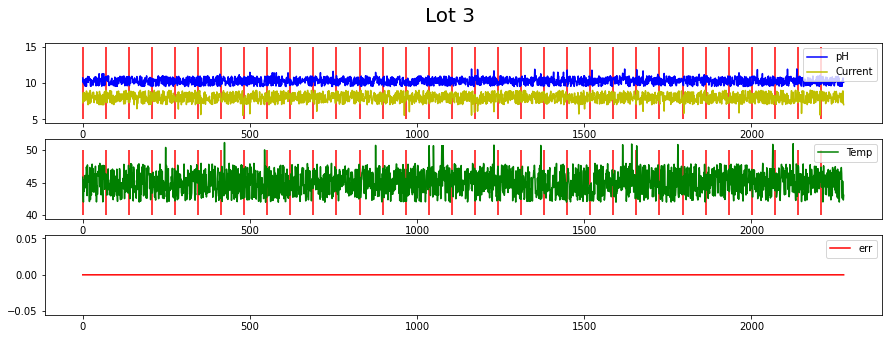

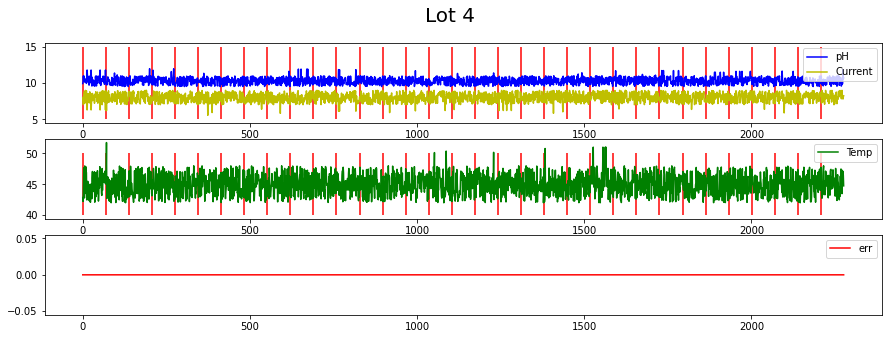

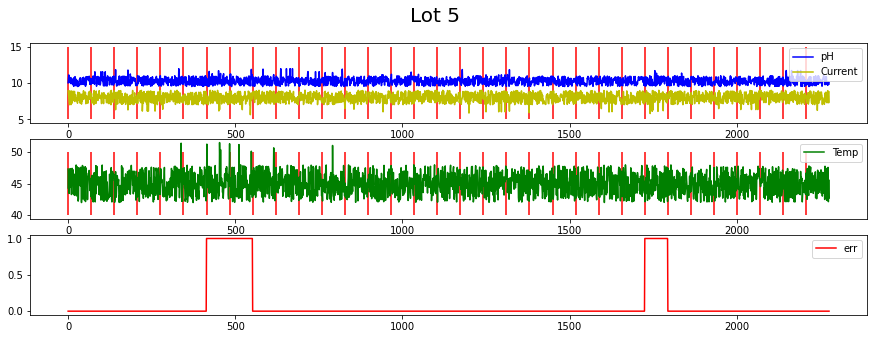

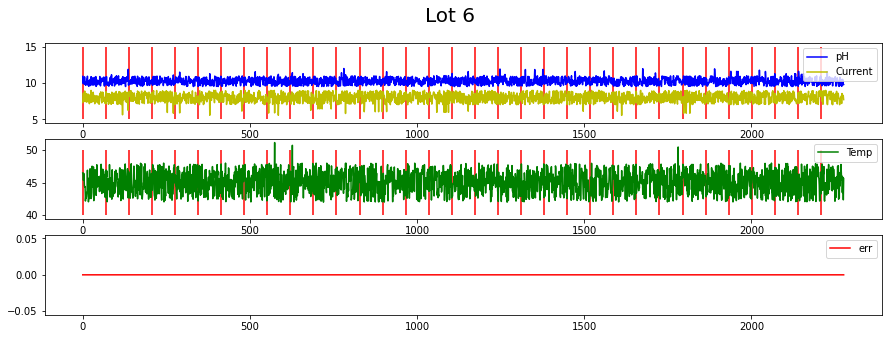

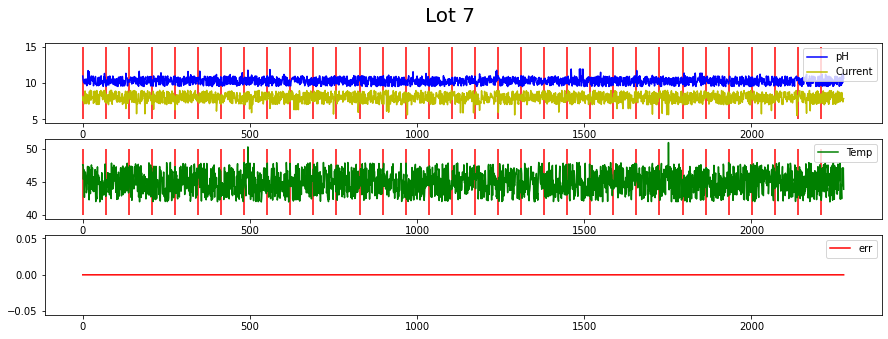

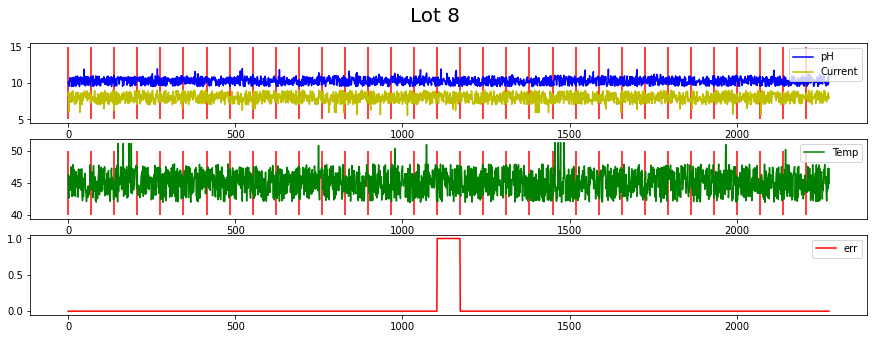

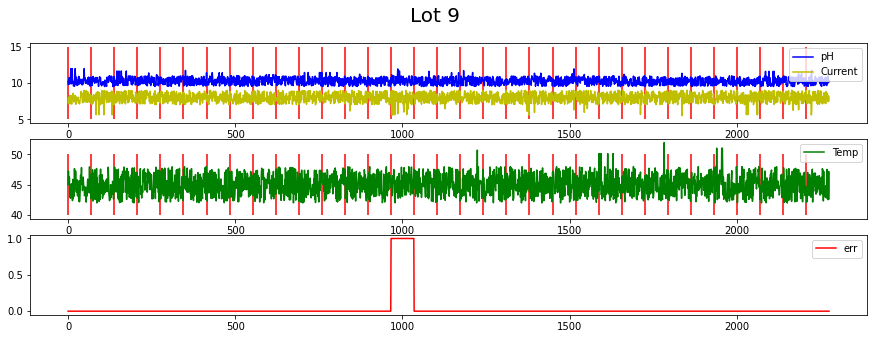

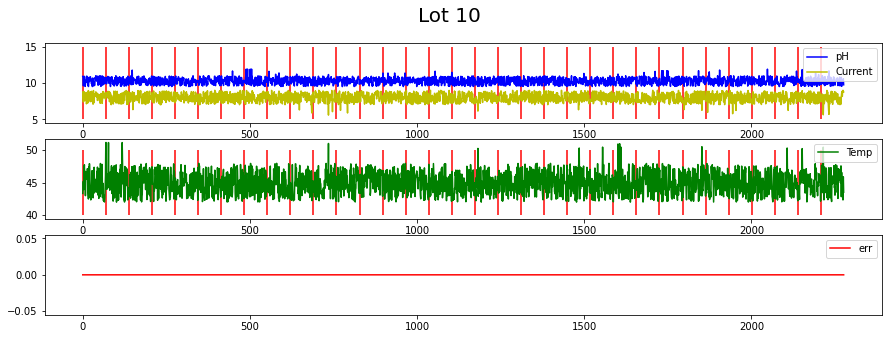

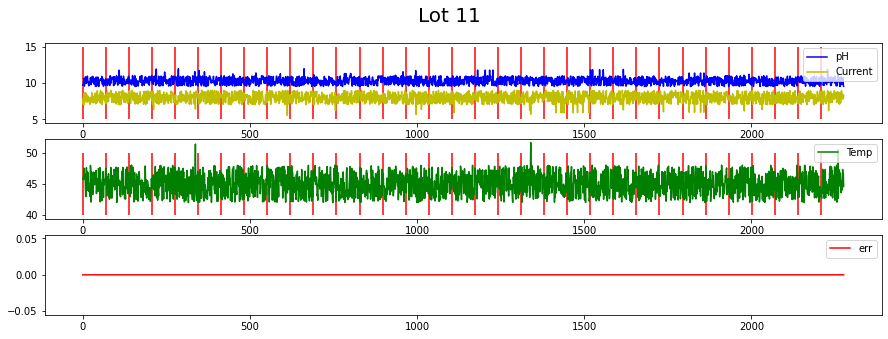

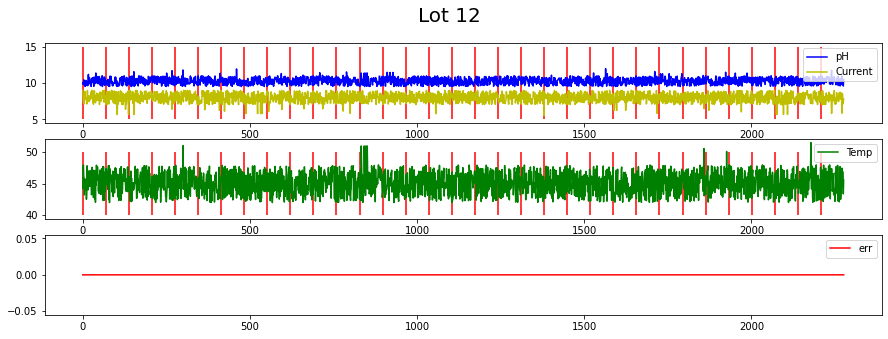

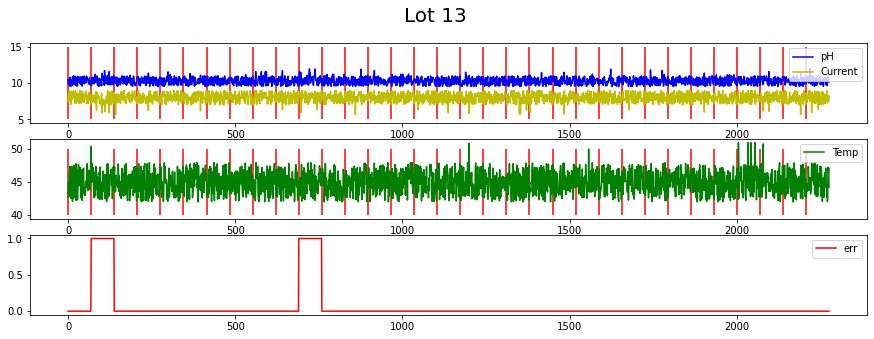

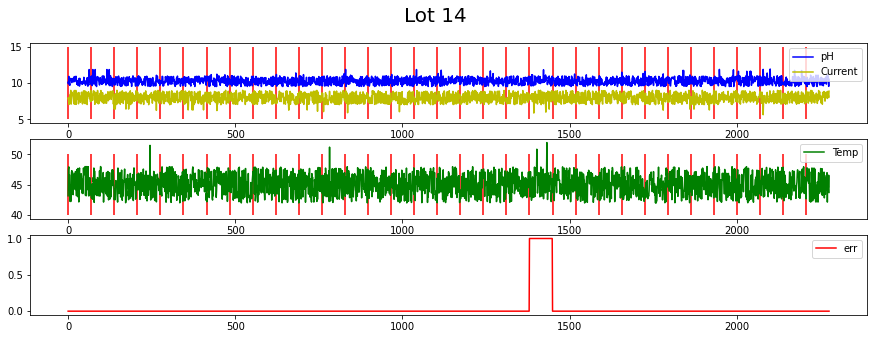

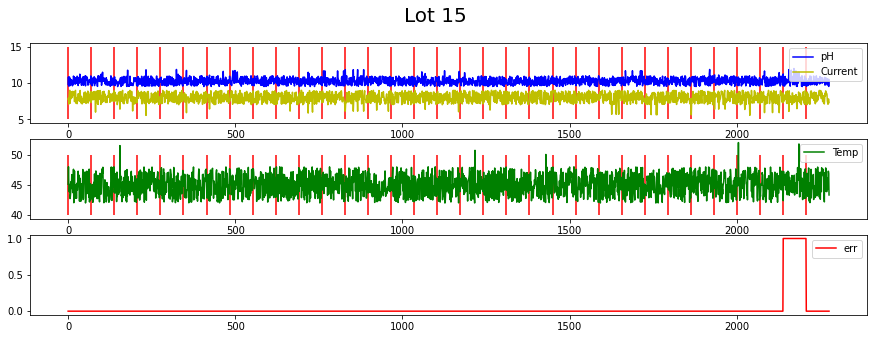

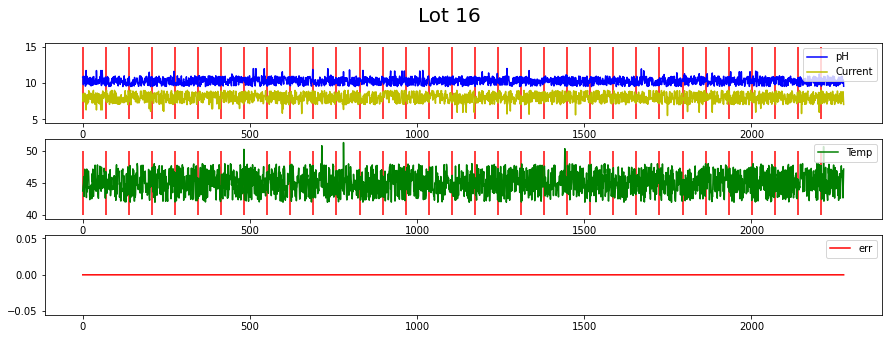

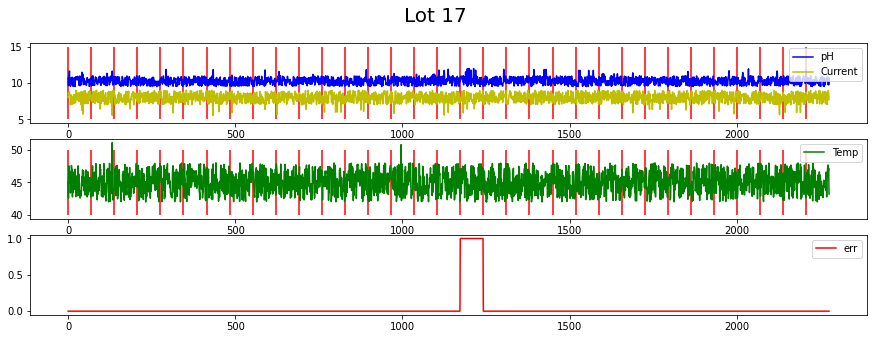

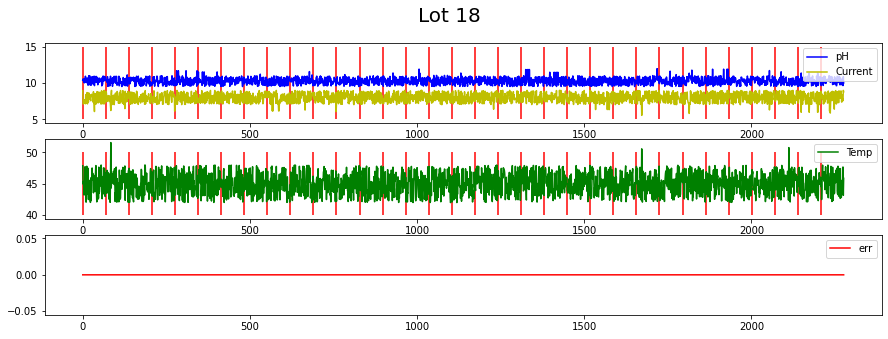

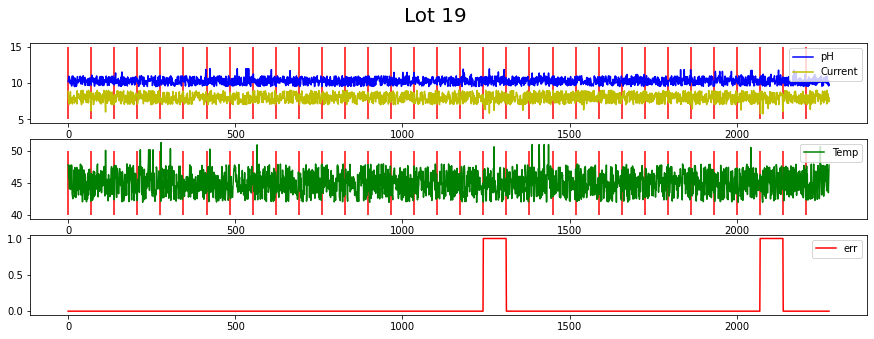

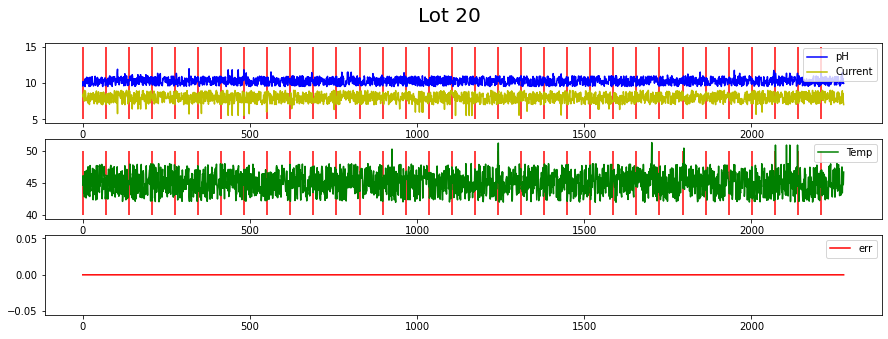

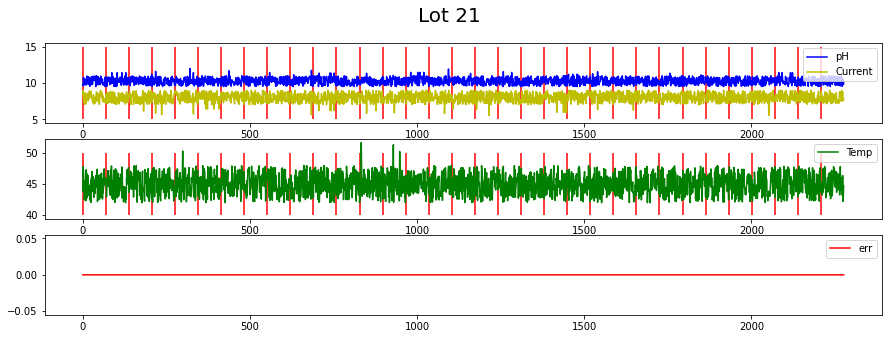

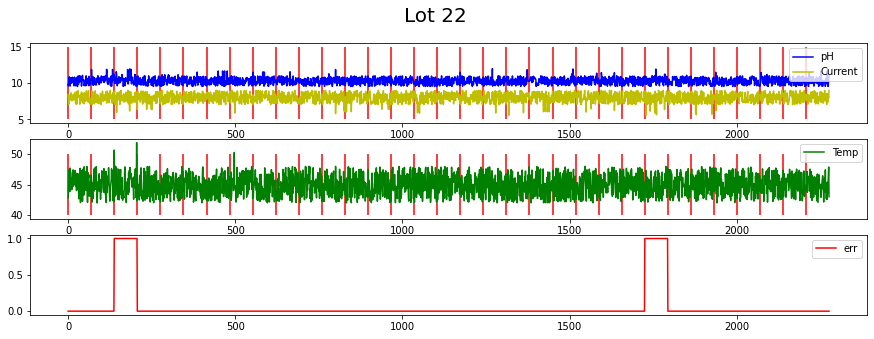

In [ ]:
for i in range(1,len(df['Lot'].unique())+1):
  df_eplot = df.loc[df['Lot']==str(i)].reset_index()
  df_eplot['Index'] = np.arange(0,len(df_eplot))

  f, axes = plt.subplots(3)
  f.set_size_inches((15, 5))
  f.suptitle('Lot %s' % i, fontsize = 20)

  axes[0].plot(df_eplot['Index'], df_eplot['pH'], 'b', label='pH')
  axes[0].plot(df_eplot['Index'], df_eplot['Current'], 'y', label='Current')
  axes[0].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[0].vlines(df_eplot['Index'][i], 5, 15, color='red')

  axes[1].plot(df_eplot['Index'], df_eplot['Temp'], 'g', label='Temp')
  axes[1].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[1].vlines(df_eplot['Index'][i], 40, 50, color='red')

  axes[2].plot(df_eplot['Index'], df_eplot['err'], 'r', label='err')
  axes[2].legend(loc = 'upper right')

  plt.show()

# 새로운 feature 추가

정규화된 데이터 plot을 보았을 때 pH, Temp, current에서 이상 값이 6개 이상 발생한 경우 오류가 날 확률이 높은 것으로 판단


## 이상치 판별

<function matplotlib.pyplot.show>

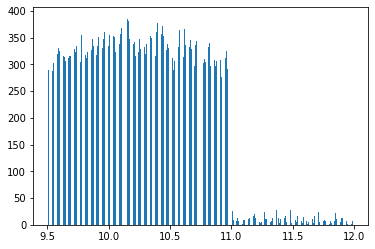

In [ ]:
plt.hist(df['pH'], bins =500)
plt.show

pH는 11이상을 이상치로 판별

<function matplotlib.pyplot.show>

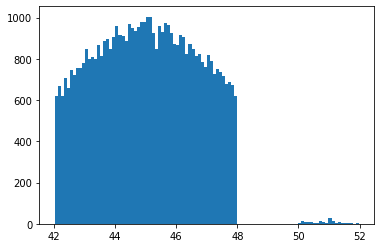

In [ ]:
plt.hist(df['Temp'], bins =100)
plt.show

Temp는 50이상을 이상치로 판별

<function matplotlib.pyplot.show>

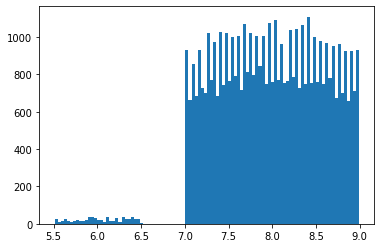

In [ ]:
plt.hist(df['Current'], bins =100)
plt.show

Current는 6.5이하를 이상치로 판별

## 정상 분포와 error분포 비교

In [ ]:
df_no = df.loc[df['err'] == 0]
df_error = df.loc[df['err'] == 1]

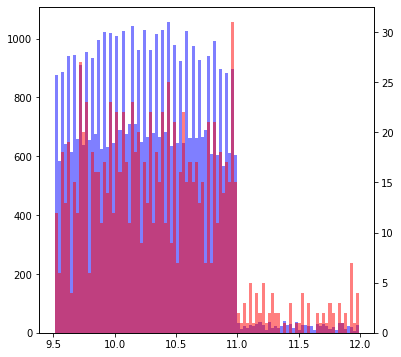

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['pH'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['pH'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

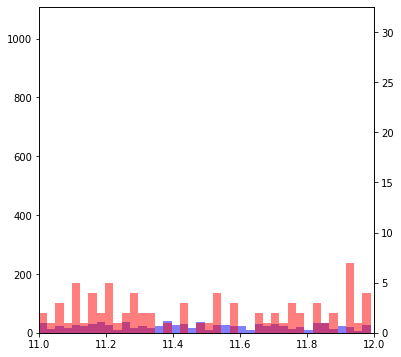

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['pH'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['pH'], bins = 100, color = 'r', alpha = 0.5)
plt.xlim([11,12])
plt.show()

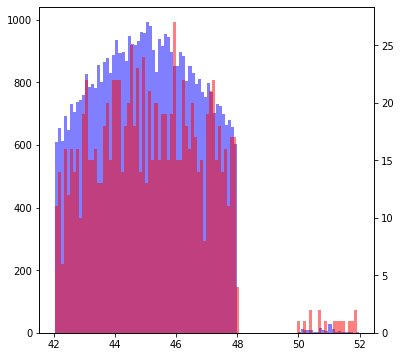

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Temp'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Temp'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

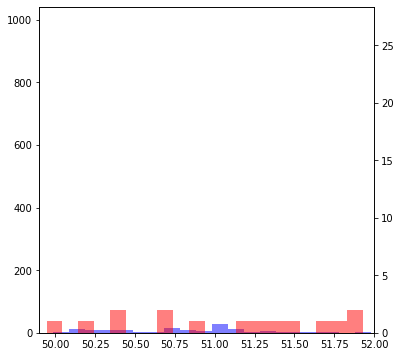

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Temp'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Temp'], bins = 100, color = 'r', alpha = 0.5)
plt.xlim([49.9,52])
plt.show()

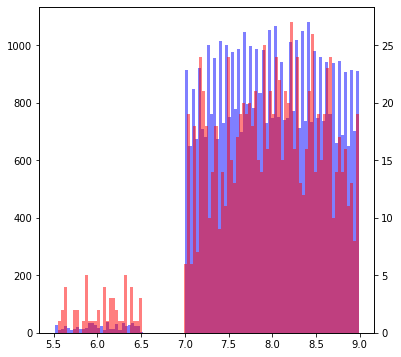

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Current'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Current'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

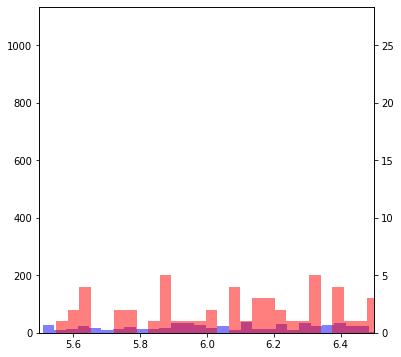

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Current'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Current'], bins = 100, color = 'r', alpha = 0.5)
plt.xlim([5.5,6.5])
plt.show()

이상치라고 판단한 범위에 정상데이터도 섞여있는것으로 보임

하지만 error데이터일수록 이상치 발생횟수가 증가

# 가중치 설정 1

pH = 0.5

Temp = 1

Current = 0.5

## 전체데이터로 확인

In [ ]:
df['pH_out'] = 0
df.loc[df['pH'] > 11, 'pH_out'] = 0.5

df['Temp_out'] = 0
df.loc[df['Temp'] >= 50, 'Temp_out'] = 1

df['Current_out'] = 0
df.loc[df['Current'] < 6.5, 'Current_out'] = 0.5  

In [ ]:
# 예시 확인
df.loc[df['Temp_out'] == 1]

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
209     210   4  오후 4:39:12.6   9.74  ...    0     0.0        1          0.5
621     622  10  오후 5:15:43.6  10.76  ...    0     0.0        1          0.0
622     623  10  오후 5:15:48.6  10.76  ...    0     0.0        1          0.0
629     630  10  오후 5:16:23.6  10.76  ...    0     0.0        1          0.0
670     671  10  오후 5:19:48.9  10.76  ...    0     0.0        1          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1013   1014  15  오후 5:52:09.6  11.51  ...    1     0.5        1          0.0
628     629  10  오후 5:21:01.6   9.86  ...    0     0.0        1          0.5
741     742  11  오후 5:30:49.4  11.26  ...    0     0.5        1          0.0
1043   1044  16  오후 5:57:48.9  10.60  ...    0     0.0        1          0.0
1284   1285  19  오후 6:18:58.7  10.27  ...    0     0.0        1          0.0

[156 rows x 11 columns]

In [ ]:
df

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
0         1   1  오후 4:29:15.0  10.37  ...    0     0.0        0          0.0
1         2   1  오후 4:29:20.0  10.90  ...    0     0.0        0          0.0
2         3   1  오후 4:29:25.0   9.61  ...    0     0.0        0          0.0
3         4   1  오후 4:29:30.0  10.32  ...    0     0.0        0          0.0
4         5   1  오후 4:29:35.0  10.36  ...    0     0.0        0          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1513   1514  22  오후 6:39:05.9   9.79  ...    0     0.0        0          0.0
1514   1515  22  오후 6:39:10.9   9.53  ...    0     0.0        0          0.0
1515   1516  22  오후 6:39:15.9   9.86  ...    0     0.0        0          0.0
1516   1517  22  오후 6:39:20.9  10.52  ...    0     0.0        0          0.0
1517   1518  22  오후 6:39:25.9  10.97  ...    0     0.0        0          0.0

[50094 rows x 11 columns]

In [ ]:
df_g = df.iloc[:,[1,6,7,8,9,10]]
df_g.head()

Lot        date  err  pH_out  Temp_out  Current_out
0   1  2021-09-06    0     0.0         0          0.0
1   1  2021-09-06    0     0.0         0          0.0
2   1  2021-09-06    0     0.0         0          0.0
3   1  2021-09-06    0     0.0         0          0.0
4   1  2021-09-06    0     0.0         0          0.0

In [ ]:
df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

In [ ]:
df_g

Lot        date  err  pH_out  Temp_out  Current_out
0     1  2021-09-06    0     0.0         0          0.0
1     1  2021-09-07    0     0.0         0          0.0
2     1  2021-09-08   69     3.5         2          1.0
3     1  2021-09-09    0     0.0         0          0.0
4     1  2021-09-10    0     1.5         0          0.0
..   ..         ...  ...     ...       ...          ...
721   9  2021-10-21    0     0.0         4          0.0
722   9  2021-10-22    0     0.0         0          2.0
723   9  2021-10-25    0     2.0         0          0.0
724   9  2021-10-26    0     1.0         0          1.0
725   9  2021-10-27    0     1.0         0          1.0

[726 rows x 6 columns]

In [ ]:
df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
df_g.loc[df_g['err'] == 69, 'err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total
0     1  2021-09-06    0     0.0         0          0.0    0.0
1     1  2021-09-07    0     0.0         0          0.0    0.0
2     1  2021-09-08    1     3.5         2          1.0    6.5
3     1  2021-09-09    0     0.0         0          0.0    0.0
4     1  2021-09-10    0     1.5         0          0.0    1.5
..   ..         ...  ...     ...       ...          ...    ...
721   9  2021-10-21    0     0.0         4          0.0    4.0
722   9  2021-10-22    0     0.0         0          2.0    2.0
723   9  2021-10-25    0     2.0         0          0.0    2.0
724   9  2021-10-26    0     1.0         0          1.0    2.0
725   9  2021-10-27    0     1.0         0          1.0    2.0

[726 rows x 7 columns]

In [ ]:
df_g['t_err'] = 0
df_g.loc[df_g['Total'] > 4, 't_err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0     1  2021-09-06    0     0.0         0          0.0    0.0      0
1     1  2021-09-07    0     0.0         0          0.0    0.0      0
2     1  2021-09-08    1     3.5         2          1.0    6.5      1
3     1  2021-09-09    0     0.0         0          0.0    0.0      0
4     1  2021-09-10    0     1.5         0          0.0    1.5      0
..   ..         ...  ...     ...       ...          ...    ...    ...
721   9  2021-10-21    0     0.0         4          0.0    4.0      0
722   9  2021-10-22    0     0.0         0          2.0    2.0      0
723   9  2021-10-25    0     2.0         0          0.0    2.0      0
724   9  2021-10-26    0     1.0         0          1.0    2.0      0
725   9  2021-10-27    0     1.0         0          1.0    2.0      0

[726 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_g['err'], df_g['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       711
           1       0.75      0.80      0.77        15

    accuracy                           0.99       726
   macro avg       0.87      0.90      0.88       726
weighted avg       0.99      0.99      0.99       726



전체 데이터로 비교해보았을 때 성능이 괜찮은 것으로 보임

모델을 함수로 만들어 보기로 함

# 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 11, 'pH_out'] = 0.5

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 50, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 6.5, 'Current_out'] = 0.5

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

### train 데이터에 적용

In [ ]:
err1 = train_model.loc[train_model['err'] == 1]
err0 = train_model.loc[train_model['err'] == 0]

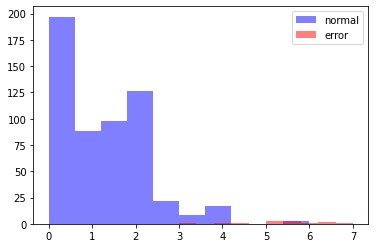

In [ ]:
plt.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
plt.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
plt.legend()
plt.show()

범주를 같게하면 잘 안보이므로 y의 범주를 다르게한 비율을 확인

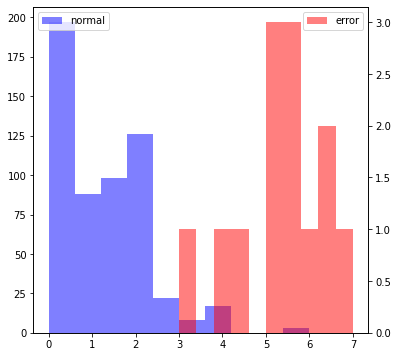

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
ax2.legend()
plt.show()

이상치의 합이 겹치는 부분은 찾기 힘든 부분이므로 가중치를 적게주고 나머지의 가중치를 크게 주기로 함

5.5이상이지만 정상으로 나온 부분은 확률이 매우 낮으므로 무시하고 진행

## 가중치 점수 4.5이상일때 error 모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 4.5, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0     0.0         0          0.0    0.0      0
1      1  2021-09-07    0     0.0         0          0.0    0.0      0
2      1  2021-09-08    1     3.5         2          1.0    6.5      1
3      1  2021-09-09    0     0.0         0          0.0    0.0      0
4      1  2021-09-10    0     1.5         0          0.0    1.5      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0     1.0         0          0.0    1.0      0
568   22  2021-10-13    0     0.5         0          1.0    1.5      0
569   22  2021-10-14    0     1.0         0          0.5    1.5      0
570   22  2021-10-15    0     0.0         0          0.0    0.0      0
571   22  2021-10-18    1     2.0         0          3.0    5.0      1

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       559
           1       0.79      0.85      0.81        13

    accuracy                           0.99       572
   macro avg       0.89      0.92      0.91       572
weighted avg       0.99      0.99      0.99       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 4.5, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0     3.0         0          2.0    5.0      1
1      1  2021-10-20    0     1.5         0          0.0    1.5      0
2      1  2021-10-21    0     1.0         0          0.0    1.0      0
3      1  2021-10-22    0     0.0         0          0.0    0.0      0
4      1  2021-10-25    0     0.0         2          0.0    2.0      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0     0.5         0          0.5    1.0      0
150   22  2021-10-22    0     0.0         0          0.0    0.0      0
151   22  2021-10-25    0     1.0         0          0.0    1.0      0
152   22  2021-10-26    0     0.0         0          0.0    0.0      0
153   22  2021-10-27    0     1.5         0          0.0    1.5      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.20      0.50      0.29         2

    accuracy                           0.97       154
   macro avg       0.60      0.74      0.63       154
weighted avg       0.98      0.97      0.97       154



5개의 오류 예측중 하나 맞음
2개의 오류중 하나 찾음

## 가중치 점수 4 이상일때 error모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 4, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0     0.0         0          0.0    0.0      0
1      1  2021-09-07    0     0.0         0          0.0    0.0      0
2      1  2021-09-08    1     3.5         2          1.0    6.5      1
3      1  2021-09-09    0     0.0         0          0.0    0.0      0
4      1  2021-09-10    0     1.5         0          0.0    1.5      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0     1.0         0          0.0    1.0      0
568   22  2021-10-13    0     0.5         0          1.0    1.5      0
569   22  2021-10-14    0     1.0         0          0.5    1.5      0
570   22  2021-10-15    0     0.0         0          0.0    0.0      0
571   22  2021-10-18    1     2.0         0          3.0    5.0      1

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       559
           1       0.38      0.92      0.53        13

    accuracy                           0.96       572
   macro avg       0.69      0.94      0.76       572
weighted avg       0.98      0.96      0.97       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 4, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0     3.0         0          2.0    5.0      1
1      1  2021-10-20    0     1.5         0          0.0    1.5      0
2      1  2021-10-21    0     1.0         0          0.0    1.0      0
3      1  2021-10-22    0     0.0         0          0.0    0.0      0
4      1  2021-10-25    0     0.0         2          0.0    2.0      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0     0.5         0          0.5    1.0      0
150   22  2021-10-22    0     0.0         0          0.0    0.0      0
151   22  2021-10-25    0     1.0         0          0.0    1.0      0
152   22  2021-10-26    0     0.0         0          0.0    0.0      0
153   22  2021-10-27    0     1.5         0          0.0    1.5      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       152
           1       0.11      1.00      0.19         2

    accuracy                           0.89       154
   macro avg       0.55      0.94      0.57       154
weighted avg       0.99      0.89      0.93       154



10개의 오류 예측중 2개 맞음
2개의 오류 중 2개 맞음

# 가중치 설정 2

pH = 0.25

Temp = 1

Current = 0.5

## 전체데이터로 확인

In [ ]:
df['pH_out'] = 0
df.loc[df['pH'] > 11, 'pH_out'] = 0.25

df['Temp_out'] = 0
df.loc[df['Temp'] >= 50, 'Temp_out'] = 1

df['Current_out'] = 0
df.loc[df['Current'] < 6.5, 'Current_out'] = 0.5  

In [ ]:
# 예시 확인
df.loc[df['Temp_out'] == 1]

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
209     210   4  오후 4:39:12.6   9.74  ...    0    0.00        1          0.5
621     622  10  오후 5:15:43.6  10.76  ...    0    0.00        1          0.0
622     623  10  오후 5:15:48.6  10.76  ...    0    0.00        1          0.0
629     630  10  오후 5:16:23.6  10.76  ...    0    0.00        1          0.0
670     671  10  오후 5:19:48.9  10.76  ...    0    0.00        1          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1013   1014  15  오후 5:52:09.6  11.51  ...    1    0.25        1          0.0
628     629  10  오후 5:21:01.6   9.86  ...    0    0.00        1          0.5
741     742  11  오후 5:30:49.4  11.26  ...    0    0.25        1          0.0
1043   1044  16  오후 5:57:48.9  10.60  ...    0    0.00        1          0.0
1284   1285  19  오후 6:18:58.7  10.27  ...    0    0.00        1          0.0

[156 rows x 11 columns]

In [ ]:
df

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
0         1   1  오후 4:29:15.0  10.37  ...    0     0.0        0          0.0
1         2   1  오후 4:29:20.0  10.90  ...    0     0.0        0          0.0
2         3   1  오후 4:29:25.0   9.61  ...    0     0.0        0          0.0
3         4   1  오후 4:29:30.0  10.32  ...    0     0.0        0          0.0
4         5   1  오후 4:29:35.0  10.36  ...    0     0.0        0          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1513   1514  22  오후 6:39:05.9   9.79  ...    0     0.0        0          0.0
1514   1515  22  오후 6:39:10.9   9.53  ...    0     0.0        0          0.0
1515   1516  22  오후 6:39:15.9   9.86  ...    0     0.0        0          0.0
1516   1517  22  오후 6:39:20.9  10.52  ...    0     0.0        0          0.0
1517   1518  22  오후 6:39:25.9  10.97  ...    0     0.0        0          0.0

[50094 rows x 11 columns]

In [ ]:
df_g = df.iloc[:,[1,6,7,8,9,10]]
df_g.head()

Lot        date  err  pH_out  Temp_out  Current_out
0   1  2021-09-06    0     0.0         0          0.0
1   1  2021-09-06    0     0.0         0          0.0
2   1  2021-09-06    0     0.0         0          0.0
3   1  2021-09-06    0     0.0         0          0.0
4   1  2021-09-06    0     0.0         0          0.0

In [ ]:
df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

In [ ]:
df_g

Lot        date  err  pH_out  Temp_out  Current_out
0     1  2021-09-06    0    0.00         0          0.0
1     1  2021-09-07    0    0.00         0          0.0
2     1  2021-09-08   69    1.75         2          1.0
3     1  2021-09-09    0    0.00         0          0.0
4     1  2021-09-10    0    0.75         0          0.0
..   ..         ...  ...     ...       ...          ...
721   9  2021-10-21    0    0.00         4          0.0
722   9  2021-10-22    0    0.00         0          2.0
723   9  2021-10-25    0    1.00         0          0.0
724   9  2021-10-26    0    0.50         0          1.0
725   9  2021-10-27    0    0.50         0          1.0

[726 rows x 6 columns]

In [ ]:
df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
df_g.loc[df_g['err'] == 69, 'err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total
0     1  2021-09-06    0    0.00         0          0.0   0.00
1     1  2021-09-07    0    0.00         0          0.0   0.00
2     1  2021-09-08    1    1.75         2          1.0   4.75
3     1  2021-09-09    0    0.00         0          0.0   0.00
4     1  2021-09-10    0    0.75         0          0.0   0.75
..   ..         ...  ...     ...       ...          ...    ...
721   9  2021-10-21    0    0.00         4          0.0   4.00
722   9  2021-10-22    0    0.00         0          2.0   2.00
723   9  2021-10-25    0    1.00         0          0.0   1.00
724   9  2021-10-26    0    0.50         0          1.0   1.50
725   9  2021-10-27    0    0.50         0          1.0   1.50

[726 rows x 7 columns]

In [ ]:
df_g['t_err'] = 0
df_g.loc[df_g['Total'] > 4, 't_err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0     1  2021-09-06    0    0.00         0          0.0   0.00      0
1     1  2021-09-07    0    0.00         0          0.0   0.00      0
2     1  2021-09-08    1    1.75         2          1.0   4.75      1
3     1  2021-09-09    0    0.00         0          0.0   0.00      0
4     1  2021-09-10    0    0.75         0          0.0   0.75      0
..   ..         ...  ...     ...       ...          ...    ...    ...
721   9  2021-10-21    0    0.00         4          0.0   4.00      0
722   9  2021-10-22    0    0.00         0          2.0   2.00      0
723   9  2021-10-25    0    1.00         0          0.0   1.00      0
724   9  2021-10-26    0    0.50         0          1.0   1.50      0
725   9  2021-10-27    0    0.50         0          1.0   1.50      0

[726 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_g['err'], df_g['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       711
           1       0.64      0.47      0.54        15

    accuracy                           0.98       726
   macro avg       0.81      0.73      0.77       726
weighted avg       0.98      0.98      0.98       726



전체 데이터로 비교해보았을 때 성능이 괜찮은 것으로 보임

모델을 함수로 만들어 보기로 함

# 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 11, 'pH_out'] = 0.25

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 50, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 6.5, 'Current_out'] = 0.5

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

### train 데이터에 적용

In [ ]:
err1 = train_model.loc[train_model['err'] == 1]
err0 = train_model.loc[train_model['err'] == 0]

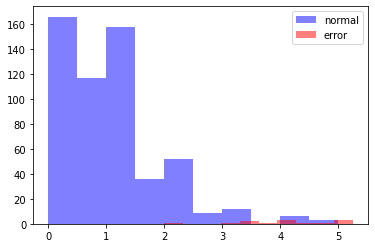

In [ ]:
plt.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
plt.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
plt.legend()
plt.show()

범주를 같게하면 잘 안보이므로 y의 범주를 다르게한 비율을 확인

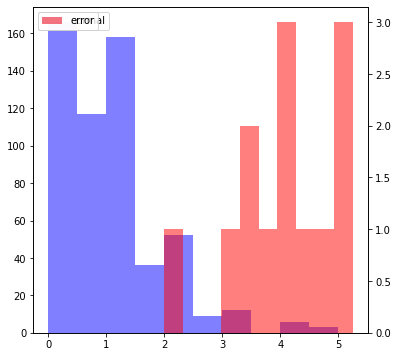

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
ax2.legend()
plt.show()

이상치의 합이 겹치는 부분은 찾기 힘든 부분이므로 가중치를 적게주고 나머지의 가중치를 크게 주기로 함

5.5이상이지만 정상으로 나온 부분은 확률이 매우 낮으므로 무시하고 진행

## 가중치 점수 3.5이상일때 error 모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 3.5, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0    0.00         0          0.0   0.00      0
1      1  2021-09-07    0    0.00         0          0.0   0.00      0
2      1  2021-09-08    1    1.75         2          1.0   4.75      1
3      1  2021-09-09    0    0.00         0          0.0   0.00      0
4      1  2021-09-10    0    0.75         0          0.0   0.75      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0    0.50         0          0.0   0.50      0
568   22  2021-10-13    0    0.25         0          1.0   1.25      0
569   22  2021-10-14    0    0.50         0          0.5   1.00      0
570   22  2021-10-15    0    0.00         0          0.0   0.00      0
571   22  2021-10-18    1    1.00         0          3.0   4.00      1

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       559
           1       0.55      0.85      0.67        13

    accuracy                           0.98       572
   macro avg       0.77      0.92      0.83       572
weighted avg       0.99      0.98      0.98       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 3.5, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0    1.50         0          2.0   3.50      1
1      1  2021-10-20    0    0.75         0          0.0   0.75      0
2      1  2021-10-21    0    0.50         0          0.0   0.50      0
3      1  2021-10-22    0    0.00         0          0.0   0.00      0
4      1  2021-10-25    0    0.00         2          0.0   2.00      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0    0.25         0          0.5   0.75      0
150   22  2021-10-22    0    0.00         0          0.0   0.00      0
151   22  2021-10-25    0    0.50         0          0.0   0.50      0
152   22  2021-10-26    0    0.00         0          0.0   0.00      0
153   22  2021-10-27    0    0.75         0          0.0   0.75      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       152
           1       0.11      0.50      0.18         2

    accuracy                           0.94       154
   macro avg       0.55      0.72      0.58       154
weighted avg       0.98      0.94      0.96       154



5개의 오류 예측중 하나 맞음
2개의 오류중 하나 찾음

## 가중치 점수 3 이상일때 error모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 3, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0    0.00         0          0.0   0.00      0
1      1  2021-09-07    0    0.00         0          0.0   0.00      0
2      1  2021-09-08    1    1.75         2          1.0   4.75      1
3      1  2021-09-09    0    0.00         0          0.0   0.00      0
4      1  2021-09-10    0    0.75         0          0.0   0.75      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0    0.50         0          0.0   0.50      0
568   22  2021-10-13    0    0.25         0          1.0   1.25      0
569   22  2021-10-14    0    0.50         0          0.5   1.00      0
570   22  2021-10-15    0    0.00         0          0.0   0.00      0
571   22  2021-10-18    1    1.00         0          3.0   4.00      1

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       559
           1       0.36      0.92      0.52        13

    accuracy                           0.96       572
   macro avg       0.68      0.94      0.75       572
weighted avg       0.98      0.96      0.97       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 3, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0    1.50         0          2.0   3.50      1
1      1  2021-10-20    0    0.75         0          0.0   0.75      0
2      1  2021-10-21    0    0.50         0          0.0   0.50      0
3      1  2021-10-22    0    0.00         0          0.0   0.00      0
4      1  2021-10-25    0    0.00         2          0.0   2.00      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0    0.25         0          0.5   0.75      0
150   22  2021-10-22    0    0.00         0          0.0   0.00      0
151   22  2021-10-25    0    0.50         0          0.0   0.50      0
152   22  2021-10-26    0    0.00         0          0.0   0.00      0
153   22  2021-10-27    0    0.75         0          0.0   0.75      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96       152
           1       0.13      1.00      0.24         2

    accuracy                           0.92       154
   macro avg       0.57      0.96      0.60       154
weighted avg       0.99      0.92      0.95       154



# 가중치 설정 3

In [ ]:
len(df.loc[(df['pH']>11) & (df['err'] == 0)])/len(df.loc[(df['err'] == 0)])

0.018712162905888827

In [ ]:
len(df.loc[(df['pH']>11) & (df['err'] == 1)])/len(df.loc[(df['err'] == 1)])

0.07439613526570048

In [ ]:
len(df.loc[(df['Temp']>=50) & (df['err'] == 0)])/len(df.loc[(df['err'] == 0)])

0.0028740903809698526

In [ ]:
len(df.loc[(df['Temp']>=50) & (df['err'] == 1)])/len(df.loc[(df['err'] == 1)])

0.014492753623188406

In [ ]:
len(df.loc[(df['Current']< 6.5) & (df['err'] == 0)])/len(df.loc[(df['err'] == 0)])

0.012107870115575124

In [ ]:
len(df.loc[(df['Current']< 6.5) & (df['err'] == 1)])/len(df.loc[(df['err'] == 1)])

0.04927536231884058

pH = 0.5

Temp = 1

Current = 0.25

## 전체데이터로 확인

In [ ]:
df['pH_out'] = 0
df.loc[df['pH'] > 11, 'pH_out'] = 0.5

df['Temp_out'] = 0
df.loc[df['Temp'] >= 50, 'Temp_out'] = 1

df['Current_out'] = 0
df.loc[df['Current'] < 6.5, 'Current_out'] = 0.25  

In [ ]:
# 예시 확인
df.loc[df['Temp_out'] == 1]

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
209     210   4  오후 4:39:12.6   9.74  ...    0    0.00        1          0.5
621     622  10  오후 5:15:43.6  10.76  ...    0    0.00        1          0.0
622     623  10  오후 5:15:48.6  10.76  ...    0    0.00        1          0.0
629     630  10  오후 5:16:23.6  10.76  ...    0    0.00        1          0.0
670     671  10  오후 5:19:48.9  10.76  ...    0    0.00        1          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1013   1014  15  오후 5:52:09.6  11.51  ...    1    0.25        1          0.0
628     629  10  오후 5:21:01.6   9.86  ...    0    0.00        1          0.5
741     742  11  오후 5:30:49.4  11.26  ...    0    0.25        1          0.0
1043   1044  16  오후 5:57:48.9  10.60  ...    0    0.00        1          0.0
1284   1285  19  오후 6:18:58.7  10.27  ...    0    0.00        1          0.0

[156 rows x 11 columns]

In [ ]:
df

Index Lot          Time     pH  ...  err  pH_out Temp_out  Current_out
0         1   1  오후 4:29:15.0  10.37  ...    0     0.0        0          0.0
1         2   1  오후 4:29:20.0  10.90  ...    0     0.0        0          0.0
2         3   1  오후 4:29:25.0   9.61  ...    0     0.0        0          0.0
3         4   1  오후 4:29:30.0  10.32  ...    0     0.0        0          0.0
4         5   1  오후 4:29:35.0  10.36  ...    0     0.0        0          0.0
...     ...  ..           ...    ...  ...  ...     ...      ...          ...
1513   1514  22  오후 6:39:05.9   9.79  ...    0     0.0        0          0.0
1514   1515  22  오후 6:39:10.9   9.53  ...    0     0.0        0          0.0
1515   1516  22  오후 6:39:15.9   9.86  ...    0     0.0        0          0.0
1516   1517  22  오후 6:39:20.9  10.52  ...    0     0.0        0          0.0
1517   1518  22  오후 6:39:25.9  10.97  ...    0     0.0        0          0.0

[50094 rows x 11 columns]

In [ ]:
df_g = df.iloc[:,[1,6,7,8,9,10]]
df_g.head()

Lot        date  err  pH_out  Temp_out  Current_out
0   1  2021-09-06    0     0.0         0          0.0
1   1  2021-09-06    0     0.0         0          0.0
2   1  2021-09-06    0     0.0         0          0.0
3   1  2021-09-06    0     0.0         0          0.0
4   1  2021-09-06    0     0.0         0          0.0

In [ ]:
df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

In [ ]:
df_g

Lot        date  err  pH_out  Temp_out  Current_out
0     1  2021-09-06    0    0.00         0          0.0
1     1  2021-09-07    0    0.00         0          0.0
2     1  2021-09-08   69    1.75         2          1.0
3     1  2021-09-09    0    0.00         0          0.0
4     1  2021-09-10    0    0.75         0          0.0
..   ..         ...  ...     ...       ...          ...
721   9  2021-10-21    0    0.00         4          0.0
722   9  2021-10-22    0    0.00         0          2.0
723   9  2021-10-25    0    1.00         0          0.0
724   9  2021-10-26    0    0.50         0          1.0
725   9  2021-10-27    0    0.50         0          1.0

[726 rows x 6 columns]

In [ ]:
df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
df_g.loc[df_g['err'] == 69, 'err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total
0     1  2021-09-06    0    0.00         0          0.0   0.00
1     1  2021-09-07    0    0.00         0          0.0   0.00
2     1  2021-09-08    1    1.75         2          1.0   4.75
3     1  2021-09-09    0    0.00         0          0.0   0.00
4     1  2021-09-10    0    0.75         0          0.0   0.75
..   ..         ...  ...     ...       ...          ...    ...
721   9  2021-10-21    0    0.00         4          0.0   4.00
722   9  2021-10-22    0    0.00         0          2.0   2.00
723   9  2021-10-25    0    1.00         0          0.0   1.00
724   9  2021-10-26    0    0.50         0          1.0   1.50
725   9  2021-10-27    0    0.50         0          1.0   1.50

[726 rows x 7 columns]

In [ ]:
df_g['t_err'] = 0
df_g.loc[df_g['Total'] > 4, 't_err'] = 1
df_g

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0     1  2021-09-06    0    0.00         0          0.0   0.00      0
1     1  2021-09-07    0    0.00         0          0.0   0.00      0
2     1  2021-09-08    1    1.75         2          1.0   4.75      1
3     1  2021-09-09    0    0.00         0          0.0   0.00      0
4     1  2021-09-10    0    0.75         0          0.0   0.75      0
..   ..         ...  ...     ...       ...          ...    ...    ...
721   9  2021-10-21    0    0.00         4          0.0   4.00      0
722   9  2021-10-22    0    0.00         0          2.0   2.00      0
723   9  2021-10-25    0    1.00         0          0.0   1.00      0
724   9  2021-10-26    0    0.50         0          1.0   1.50      0
725   9  2021-10-27    0    0.50         0          1.0   1.50      0

[726 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_g['err'], df_g['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       711
           1       0.64      0.47      0.54        15

    accuracy                           0.98       726
   macro avg       0.81      0.73      0.77       726
weighted avg       0.98      0.98      0.98       726



전체 데이터로 비교해보았을 때 성능이 괜찮은 것으로 보임

모델을 함수로 만들어 보기로 함

# 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 11, 'pH_out'] = 0.5

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 50, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 6.5, 'Current_out'] = 0.25

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

### train 데이터에 적용

In [ ]:
err1 = train_model.loc[train_model['err'] == 1]
err0 = train_model.loc[train_model['err'] == 0]

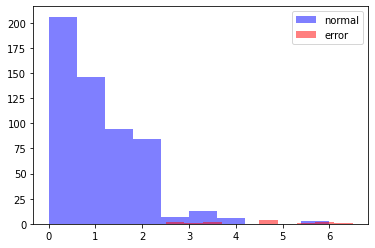

In [ ]:
plt.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
plt.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
plt.legend()
plt.show()

범주를 같게하면 잘 안보이므로 y의 범주를 다르게한 비율을 확인

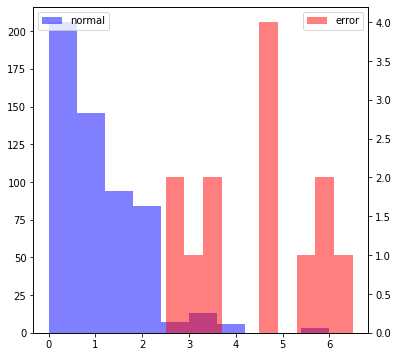

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(err0['Total'], bins = 10, color = 'b', alpha = 0.5, label = 'normal')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.hist(err1['Total'], bins = 10, color = 'r', alpha = 0.5, label = 'error')
ax2.legend()
plt.show()

이상치의 합이 겹치는 부분은 찾기 힘든 부분이므로 가중치를 적게주고 나머지의 가중치를 크게 주기로 함

5.5이상이지만 정상으로 나온 부분은 확률이 매우 낮으므로 무시하고 진행

## 가중치 점수 4.5이상일때 error 모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 4.5, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0     0.0         0         0.00   0.00      0
1      1  2021-09-07    0     0.0         0         0.00   0.00      0
2      1  2021-09-08    1     3.5         2         0.50   6.00      1
3      1  2021-09-09    0     0.0         0         0.00   0.00      0
4      1  2021-09-10    0     1.5         0         0.00   1.50      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0     1.0         0         0.00   1.00      0
568   22  2021-10-13    0     0.5         0         0.50   1.00      0
569   22  2021-10-14    0     1.0         0         0.25   1.25      0
570   22  2021-10-15    0     0.0         0         0.00   0.00      0
571   22  2021-10-18    1     2.0         0         1.50   3.50      0

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       559
           1       0.73      0.62      0.67        13

    accuracy                           0.99       572
   macro avg       0.86      0.81      0.83       572
weighted avg       0.99      0.99      0.99       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 4.5, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0     3.0         0         1.00   4.00      0
1      1  2021-10-20    0     1.5         0         0.00   1.50      0
2      1  2021-10-21    0     1.0         0         0.00   1.00      0
3      1  2021-10-22    0     0.0         0         0.00   0.00      0
4      1  2021-10-25    0     0.0         2         0.00   2.00      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0     0.5         0         0.25   0.75      0
150   22  2021-10-22    0     0.0         0         0.00   0.00      0
151   22  2021-10-25    0     1.0         0         0.00   1.00      0
152   22  2021-10-26    0     0.0         0         0.00   0.00      0
153   22  2021-10-27    0     1.5         0         0.00   1.50      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.33      0.50      0.40         2

    accuracy                           0.98       154
   macro avg       0.66      0.74      0.70       154
weighted avg       0.98      0.98      0.98       154



5개의 오류 예측중 하나 맞음
2개의 오류중 하나 찾음

## 가중치 점수 2.5 이상일때 error모델

In [ ]:
train_model['t_err'] = 0
train_model.loc[train_model['Total'] >= 2.5, 't_err'] = 1
train_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-09-06    0     0.0         0         0.00   0.00      0
1      1  2021-09-07    0     0.0         0         0.00   0.00      0
2      1  2021-09-08    1     3.5         2         0.50   6.00      1
3      1  2021-09-09    0     0.0         0         0.00   0.00      0
4      1  2021-09-10    0     1.5         0         0.00   1.50      0
..   ...         ...  ...     ...       ...          ...    ...    ...
567   22  2021-10-12    0     1.0         0         0.00   1.00      0
568   22  2021-10-13    0     0.5         0         0.50   1.00      0
569   22  2021-10-14    0     1.0         0         0.25   1.25      0
570   22  2021-10-15    0     0.0         0         0.00   0.00      0
571   22  2021-10-18    1     2.0         0         1.50   3.50      1

[572 rows x 8 columns]

### 가설 예측

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       559
           1       0.31      1.00      0.47        13

    accuracy                           0.95       572
   macro avg       0.65      0.97      0.72       572
weighted avg       0.98      0.95      0.96       572



### test 데이터 확인

In [ ]:
test_model['t_err'] = 0
test_model.loc[test_model['Total'] >= 2.5, 't_err'] = 1
test_model

Lot        date  err  pH_out  Temp_out  Current_out  Total  t_err
0      1  2021-10-19    0     3.0         0         1.00   4.00      1
1      1  2021-10-20    0     1.5         0         0.00   1.50      0
2      1  2021-10-21    0     1.0         0         0.00   1.00      0
3      1  2021-10-22    0     0.0         0         0.00   0.00      0
4      1  2021-10-25    0     0.0         2         0.00   2.00      0
..   ...         ...  ...     ...       ...          ...    ...    ...
149   22  2021-10-21    0     0.5         0         0.25   0.75      0
150   22  2021-10-22    0     0.0         0         0.00   0.00      0
151   22  2021-10-25    0     1.0         0         0.00   1.00      0
152   22  2021-10-26    0     0.0         0         0.00   0.00      0
153   22  2021-10-27    0     1.5         0         0.00   1.50      0

[154 rows x 8 columns]

### test score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       152
           1       0.09      1.00      0.17         2

    accuracy                           0.87       154
   macro avg       0.55      0.93      0.55       154
weighted avg       0.99      0.87      0.92       154

